# Project Topic:-CLUSTERING

##Importing Necessary Libraries

In [125]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

data=pd.read_excel('/content/World_development_mesurement (1).xlsx')
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


##Basic information of the data

### About Columns:<br>


> Birth Rate: The number of live births per 1,000 people.<br>
CO2 Emissions: The amount of carbon dioxide emitted.<br>
Days to Start Business: The number of days required to start a business.<br>
Ease of Business: A measure of how easy it is to do business in a country.<br>
Energy Usage: The amount of energy consumed.<br>
Health Exp % GDP: Percentage of GDP spent on health expenses.<br>
Hours to do Tax: The number of hours required to prepare and pay taxes.<br>
Infant Mortality Rate: The number of infant deaths per 1,000 live births.<br>
Internet Usage: The percentage of the population using the internet.<br>
Lending Interest: The lending interest rate.<br>
Life Expectancy Female: Average life expectancy for females.<br>
Life Expectancy Male: Average life expectancy for males.<br>
Mobile Phone Usage: The percentage of the population using mobile phones.<br>
Number of Records: The count of records; might be an identifier.<br>
Population 0-14, Population 15-64, Population 65+: Population distribution across age groups.<br>
Population Total: Total population.<br>
Population Urban: Percentage of the population living in urban areas.<br>
> Business Tax Rate: The tax rate for businesses.<br>
Country: The name of the country.<br>
GDP: Gross Domestic Product of the country.<br>
Health Exp/Capita: Health expenditure per capita.<br>
Tourism Inbound: Inbound tourism statistics.<br>
Tourism Outbound: Outbound tourism statistics.<br>

In [3]:
data.shape

(2704, 25)

In [4]:
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
#Identifying Numerical and Categorical Columns.

data_types=data.dtypes

numerical_columns=data_types[data_types !='object'].index
print('Numerical Columns: \n',numerical_columns)
categorical_columns=data_types[data_types =='object'].index
print('\n Categorical Columns : \n',categorical_columns)

Numerical Columns: 
 Index(['Birth Rate', 'CO2 Emissions', 'Days to Start Business',
       'Ease of Business', 'Energy Usage', 'Health Exp % GDP',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Number of Records', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban'],
      dtype='object')

 Categorical Columns : 
 Index(['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')


Comment:-<br>
* Ideally these columns should be Numerical.
  > Business Tax Rate<br>
  > GDP <br>
  > Health Exp/Capita<br>
  > Tourism Inbound <br>
  > Tourism Outbound

  but as given in the data these columns are categorical in nature.

In [7]:
data.sample(5)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2259,0.013,37.0%,136.0,Dominica,13.0,NaN,NaN,"$475,185,185",0.060,$400,...,NaN,1.5,1,NaN,NaN,NaN,71167,0.681,"$95,000,000","$13,000,000"
568,0.021,NaN,NaN,Guam,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,0.4,1,0.302,0.641,0.058,157241,0.933,NaN,NaN
2569,0.022,26.8%,NaN,Maldives,9.0,81.0,NaN,"$2,113,179,304",0.085,$558,...,77.0,1.7,1,0.290,0.660,0.050,338442,0.423,"$1,873,000,000","$270,000,000"
341,0.008,NaN,321651.0,Ukraine,NaN,NaN,134096.0,"$38,009,344,577",0.057,$44,...,63.0,0.0,1,0.168,0.691,0.141,48683865,0.672,"$759,000,000","$676,000,000"
2227,0.032,47.8%,21852.0,"Yemen, Rep.",12.0,NaN,8360.0,"$31,743,751,169",0.051,$66,...,61.0,0.5,1,0.420,0.553,0.027,22763008,0.317,"$1,161,000,000","$252,000,000"


In [8]:
#Converting  (Categorical column) to (Numerical column)

# Business Tax Rate - having {%}symbol
# GDP -having {$,}
# Health Exp/Capita -having {$,}
# Tourism Inbound -having {$,}
# Tourism Outbound -having {$,}


data['Business Tax Rate']=data['Business Tax Rate'].replace('[\%]','',regex=True).astype(float)
data['GDP']=data['GDP'].replace('[\$,]','',regex=True).astype(float)
data['Health Exp/Capita']=data['Health Exp/Capita'].replace('[\$,]','',regex=True).astype(float)
data['Tourism Inbound']=data['Tourism Inbound'].replace('[\$,]','',regex=True).astype(float)
data['Tourism Outbound']=data['Tourism Outbound'].replace('[\$,]','',regex=True).astype(float)


print(data.dtypes)

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object


In [9]:
#Identifying Numerical and Categorical Columns.

data_types=data.dtypes

numerical_columns=data_types[data_types !='object'].index
print('Numerical Columns: \n',numerical_columns)
categorical_columns=data_types[data_types =='object'].index
print('\n Categorical Columns : \n',categorical_columns)

Numerical Columns: 
 Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

 Categorical Columns : 
 Index(['Country'], dtype='object')


Comment:-<br>
* Now ,if we check there is ony one Categorical column left in the data that is 'Country'.

In [10]:
#To find the duplicated rows

data.duplicated().sum()

0

##Exploratory Data Analysis

In [11]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 62.3 MB/s eta 0:00:00


In [12]:
import sweetviz as sv

In [13]:
#Speeding up EDA
sweet_report = sv.analyze(data)
sweet_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
#Checking for null values

data.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

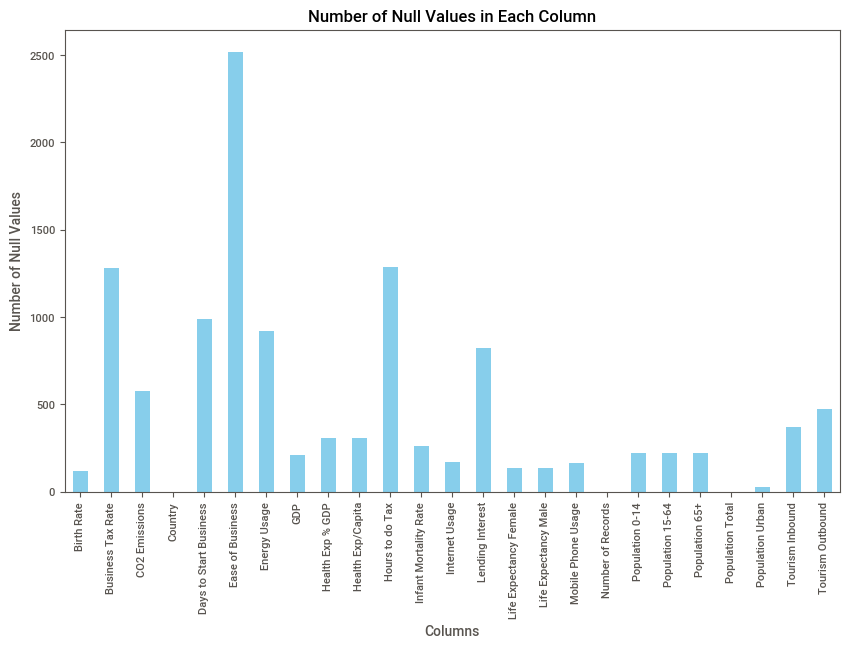

In [15]:
# Calculate the number of null values for each column
null_counts = data.isna().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()


In [16]:
#Dropping columns who are having null values more than 30%

# Calculating the percentage of null values for each column
null_percentage = (data.isnull().mean() * 100).round(2)

# Identify columns with more than 30% null values
columns_to_drop = null_percentage[null_percentage > 30].index
print('Columns having null values more than 30% are :-',columns_to_drop,'\n\n')

# Drop columns with more than 30% null values
data1= data.drop(columns=columns_to_drop)

Columns having null values more than 30% are :- Index(['Business Tax Rate', 'Days to Start Business', 'Ease of Business',
       'Energy Usage', 'Hours to do Tax', 'Lending Interest'],
      dtype='object') 




In [17]:
# List of columns to drop as they are not much significant

columns_to_drop = ['Number of Records', 'Population 0-14', 'Population 15-64','Population 65+']

# Drop specified columns
data2= data1.drop(columns=columns_to_drop)

# Display the updated DataFrame
data2

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,5.479006e+10,0.035,60.0,0.034,0.0,71.0,67.0,0.0,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,9542.0,Angola,9.129595e+09,0.034,22.0,0.128,0.0,47.0,44.0,0.0,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,1617.0,Benin,2.359122e+09,0.043,15.0,0.090,0.0,57.0,53.0,0.0,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,4276.0,Botswana,5.788312e+09,0.047,152.0,0.054,0.0,52.0,49.0,0.1,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,1041.0,Burkina Faso,2.610959e+09,0.051,12.0,0.096,0.0,52.0,49.0,0.0,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,NaN,United States,1.624460e+13,0.179,8895.0,0.006,0.8,81.0,76.0,1.0,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,NaN,Uruguay,5.000435e+10,0.089,1308.0,0.010,0.5,80.0,74.0,1.5,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,NaN,"Venezuela, RB",3.812862e+11,0.046,593.0,0.013,0.5,78.0,72.0,1.0,29954782,0.889,9.040000e+08,3.202000e+09


In [18]:
#Calculating the null value percentage of data2

(data2.isnull().mean() * 100).round(2)

Birth Rate                 4.40
CO2 Emissions             21.41
Country                    0.00
GDP                        7.77
Health Exp % GDP          11.43
Health Exp/Capita         11.43
Infant Mortality Rate      9.62
Internet Usage             6.40
Life Expectancy Female     5.03
Life Expectancy Male       5.03
Mobile Phone Usage         6.18
Population Total           0.00
Population Urban           0.96
Tourism Inbound           13.61
Tourism Outbound          17.42
dtype: float64

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   Country                 2704 non-null   object 
 3   GDP                     2494 non-null   float64
 4   Health Exp % GDP        2395 non-null   float64
 5   Health Exp/Capita       2395 non-null   float64
 6   Infant Mortality Rate   2444 non-null   float64
 7   Internet Usage          2531 non-null   float64
 8   Life Expectancy Female  2568 non-null   float64
 9   Life Expectancy Male    2568 non-null   float64
 10  Mobile Phone Usage      2537 non-null   float64
 11  Population Total        2704 non-null   int64  
 12  Population Urban        2678 non-null   float64
 13  Tourism Inbound         2336 non-null   float64
 14  Tourism Outbound        2233 non-null   

In [20]:
data2.columns

Index(['Birth Rate', 'CO2 Emissions', 'Country', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound'],
      dtype='object')

In [21]:
data2['Country'].nunique()

208

###Working for Null Values

Treatment of Column 'Birth Rate'

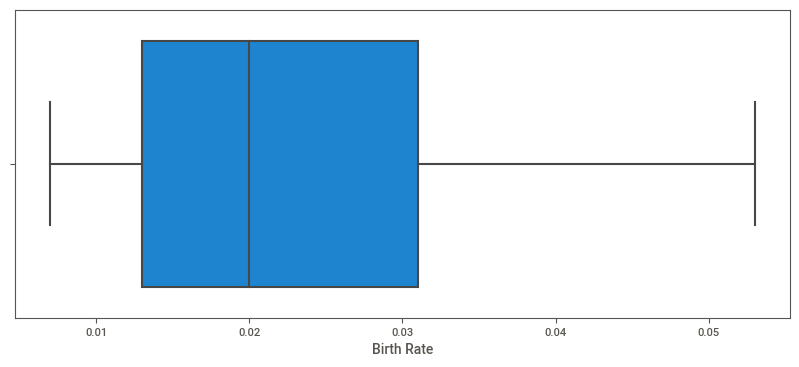

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data2['Birth Rate'])
plt.show()


In [23]:
data2['Birth Rate'].describe()

count    2585.000000
mean        0.022715
std         0.011338
min         0.007000
25%         0.013000
50%         0.020000
75%         0.031000
max         0.053000
Name: Birth Rate, dtype: float64

In [24]:
#Null value Imputation for 'Birth Rate' Column

# Group the data by 'Country' and calculate the mean 'Birth Rate' for each country
mean_birth_rate_per_country = data2.groupby('Country')['Birth Rate'].mean().reset_index()

# Merge the original DataFrame with the mean 'Birth Rate' data
data2_imputed = pd.merge(data2, mean_birth_rate_per_country, on='Country', suffixes=('', '_mean'))

# Fill NaN values in 'Birth Rate' with the mean 'Birth Rate' for each country
data2_imputed['Birth Rate'].fillna(data2_imputed['Birth Rate_mean'], inplace=True)

# Drop the auxiliary 'Birth Rate_mean' column
data2_imputed.drop('Birth Rate_mean', axis=1, inplace=True)

# Display the result
data2_imputed.sample(5)


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1228,0.009,23175.0,Croatia,4.985508e+10,0.070,790.0,0.006,0.4,79.0,73.0,1.0,4440000,0.566,8.296000e+09,770000000.0
1428,0.018,NaN,Kosovo,6.630214e+09,NaN,NaN,NaN,NaN,72.0,68.0,NaN,1790957,NaN,NaN,NaN
1834,0.018,16208.0,Lebanon,1.764975e+10,0.109,571.0,0.016,0.1,77.0,73.0,0.2,3357600,0.861,8.370000e+08,NaN
2517,0.025,4353.0,Paraguay,1.850413e+10,0.056,167.0,0.022,0.1,74.0,70.0,0.9,6236005,0.580,1.280000e+08,208000000.0
2440,0.027,2263.0,Haiti,6.584649e+09,0.065,43.0,0.060,0.1,63.0,60.0,0.4,9765153,0.505,3.120000e+08,433000000.0


In [25]:
data2_imputed['Birth Rate'].isna().sum()

26

In [26]:
# Check for null values in 'Birth Rate' column
countries_with_null_birth_rate = data2_imputed[data2_imputed['Birth Rate'].isna()]['Country'].unique()

# Display the result
print("Countries with Null Birth Rate:")
print(countries_with_null_birth_rate)


# List of countries to remove
countries_to_remove = countries_with_null_birth_rate

# Remove rows for the specified countries where 'Birth Rate' is null
data3 = data2_imputed[~((data2_imputed['Country'].isin(countries_to_remove)) & data2_imputed['Birth Rate'].isna())]

# Display the result
data3.sample(5)



Countries with Null Birth Rate:
['Monaco' 'Turks and Caicos Islands']


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1584,0.010,NaN,Poland,5.157713e+11,0.068,915.0,0.005,0.6,81.0,73.0,1.3,38534157,0.608,1.159800e+10,8.882000e+09
535,0.043,609.0,Sierra Leone,1.239004e+09,0.160,44.0,0.136,0.0,40.0,39.0,0.0,4493047,0.361,3.800000e+07,3.900000e+07
2141,0.017,179639.0,Argentina,3.784962e+11,0.094,726.0,0.013,0.3,79.0,72.0,1.3,40023641,0.908,4.476000e+09,5.766000e+09
2390,0.014,NaN,Greenland,NaN,NaN,NaN,NaN,0.6,NaN,NaN,1.0,56890,0.848,NaN,NaN
2548,0.013,NaN,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30519,1.000,5.110000e+08,1.270000e+08


In [27]:
data3['Birth Rate'].isna().sum()

0

In [28]:
data3['Country'].nunique()

206

Treatment of Column 'CO2 Emissions'

In [29]:
data3['CO2 Emissions'].isna().sum()

564

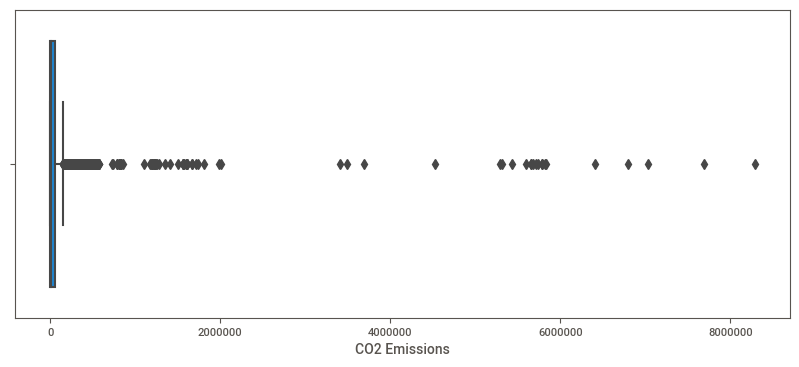

In [30]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data3['CO2 Emissions'])
plt.show()

In [31]:
data3['CO2 Emissions'].describe()

count    2.114000e+03
mean     1.430470e+05
std      6.174443e+05
min      7.000000e+00
25%      1.423750e+03
50%      8.614000e+03
75%      6.027275e+04
max      8.286892e+06
Name: CO2 Emissions, dtype: float64

In [32]:
#Null value Imputation for 'CO2 Emissions' Column

# Group the data by 'Country' and calculate the median 'CO2 Emissions' for each country
median_CO2_Emissions_per_country = data3.groupby('Country')['CO2 Emissions'].median().reset_index()

# Merge the original DataFrame with the median 'CO2 Emissions' data
data3_imputed = pd.merge(data3, median_CO2_Emissions_per_country, on='Country', suffixes=('', '_median'))

# Fill NaN values in 'CO2 Emissions' with the median 'CO2 Emissions' for each country
data3_imputed['CO2 Emissions'].fillna(data3_imputed['CO2 Emissions_median'], inplace=True)

# Drop the auxiliary 'CO2 Emissions_median' column
data3_imputed.drop('CO2 Emissions_median', axis=1, inplace=True)

# Display the result
data3_imputed.sample(5)

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1858,0.011,51881.0,Qatar,1.899446e+11,0.022,2029.0,0.007,0.7,79.0,78.0,1.3,2050514,0.989,7.220000e+09,1.070200e+10
2071,0.035,180.0,Solomon Islands,3.751097e+08,0.056,46.0,0.029,0.0,67.0,64.0,0.0,457827,0.174,3.500000e+06,1.230000e+07
2097,0.030,55.0,Vanuatu,3.649969e+08,0.035,62.0,0.018,0.0,71.0,67.0,0.1,204135,0.228,9.300000e+07,1.500000e+07
1337,0.008,808860.0,Germany,3.628110e+12,0.113,4996.0,0.003,0.8,83.0,78.0,1.1,81797673,0.745,5.339900e+10,1.001650e+11
1878,0.027,53590.0,Syrian Arab Republic,3.333284e+10,0.038,66.0,0.015,0.1,77.0,73.0,0.2,18804914,0.542,2.113000e+09,5.850000e+08


In [33]:
data3_imputed['CO2 Emissions'].isna().sum()

156

In [34]:
# Check for null values in 'CO2 Emissions' column
countries_with_null_CO2_Emissions = data3_imputed[data3_imputed['CO2 Emissions'].isna()]['Country'].unique()

# Display the result
print("Countries with Null CO2 Emissions:")
print(countries_with_null_CO2_Emissions)


# List of countries to remove
countries_to_remove = countries_with_null_CO2_Emissions

# Remove rows for the specified countries where 'Birth Rate' is null
data4 = data3_imputed[~((data3_imputed['Country'].isin(countries_to_remove)) & data3_imputed['CO2 Emissions'].isna())]

# Display the result
data4.sample(5)



Countries with Null CO2 Emissions:
['South Sudan' 'Isle of Man' 'Kosovo' 'Liechtenstein' 'San Marino'
 'American Samoa' 'Guam' 'Curacao' 'Puerto Rico'
 'Sint Maarten (Dutch part)' 'St. Martin (French part)'
 'Virgin Islands (U.S.)']


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
419,0.021,37561.0,Morocco,4.982265e+10,0.053,88.0,0.038,0.0,70.0,67.0,0.2,29586937,0.543,3.802000e+09,8.450000e+08
2016,0.020,1907.0,New Caledonia,NaN,NaN,NaN,NaN,0.2,78.0,72.0,0.3,217324,0.622,9.400000e+07,NaN
65,0.042,301.0,Burundi,8.704861e+08,0.063,7.0,0.092,0.0,49.0,47.0,0.0,6674286,0.082,1.400000e+06,1.400000e+07
1867,0.022,418240.0,Saudi Arabia,5.197968e+11,0.031,566.0,0.016,0.4,76.0,73.0,1.4,26366358,0.816,6.775000e+09,1.600500e+10
2112,0.018,425.0,Antigua and Barbuda,1.141418e+09,0.045,607.0,0.010,0.3,77.0,72.0,1.3,83467,0.286,3.270000e+08,4.500000e+07


In [35]:
data4['CO2 Emissions'].isna().sum()

0

In [36]:
data4['Country'].nunique()

194

Treatment of Column 'GDP'

In [37]:
data4['GDP'].isna().sum()

98

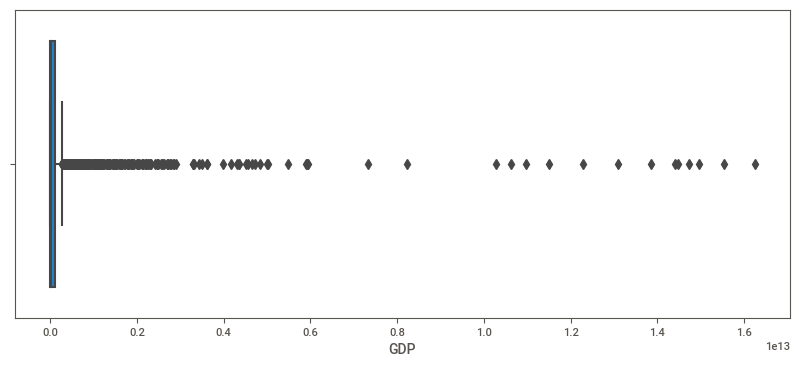

In [38]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data4['GDP'])
plt.show()

In [39]:
data4['GDP'].describe()

count    2.424000e+03
mean     2.709094e+11
std      1.145328e+12
min      6.310127e+07
25%      3.663499e+09
50%      1.595780e+10
75%      1.156352e+11
max      1.624460e+13
Name: GDP, dtype: float64

In [40]:
#Null value Imputation for 'GDP' Column

# Group the data by 'Country' and calculate the median 'GDP' for each country
median_GDP_per_country = data4.groupby('Country')['GDP'].median().reset_index()

# Merge the original DataFrame with the median 'GDP' data
data4_imputed = pd.merge(data4, median_GDP_per_country, on='Country', suffixes=('', '_median'))

# Fill NaN values in 'GDP' with the median 'GDP' for each country
data4_imputed['GDP'].fillna(data4_imputed['GDP_median'], inplace=True)

# Drop the auxiliary 'GDP_median' column
data4_imputed.drop('GDP_median', axis=1, inplace=True)

# Display the result
data4_imputed.sample(5)

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2396,0.026,4089.0,Paraguay,8.033877e+09,0.059,82.0,0.025,0.0,73.0,69.0,0.3,5793330,0.571,87000000.0,121000000.0
1809,0.029,39068.0,Syrian Arab Republic,2.158225e+10,0.049,57.0,0.018,0.0,76.0,72.0,0.0,16994676,0.527,970000000.0,760000000.0
891,0.023,5871.0,Kyrgyz Republic,3.802566e+09,0.069,51.0,0.032,0.1,72.0,64.0,0.4,5268400,0.353,392000000.0,215000000.0
223,0.042,4481.0,Ethiopia,7.707035e+09,0.047,5.0,0.083,0.0,55.0,53.0,0.0,69948344,0.151,261000000.0,55000000.0
720,0.023,37554.0,Bangladesh,6.027756e+10,0.032,13.0,0.051,0.0,68.0,67.0,0.1,143135180,0.268,79000000.0,375000000.0


In [41]:
data4_imputed['GDP'].isna().sum()

52

In [42]:
# Check for null values in 'GDP' column
countries_with_null_GDP = data4_imputed[data4_imputed['GDP'].isna()]['Country'].unique()

# Display the result
print("Countries with Null GDP:")
print(countries_with_null_GDP)


# List of countries to remove
countries_to_remove = countries_with_null_GDP

# Remove rows for the specified countries where 'GDP' is null
data5 = data4_imputed[~((data4_imputed['Country'].isin(countries_to_remove)) & data4_imputed['GDP'].isna())]

# Display the result
data5.sample(5)



Countries with Null GDP:
['Somalia' 'Korea, Dem. Rep.' 'Myanmar' 'Cayman Islands']


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2490,0.014,5828697.0,United States,1.448030e+13,0.161,7486.0,0.007,0.8,80.0,75.0,0.8,301231207,0.803,1.488460e+11,1.111020e+11
1345,0.010,57235.0,Hungary,1.125332e+11,0.083,922.0,0.007,0.5,77.0,69.0,1.0,10071370,0.669,4.998000e+09,2.319000e+09
2474,0.015,30993.0,Trinidad and Tobago,1.288471e+10,0.052,522.0,0.024,0.3,73.0,65.0,0.5,1290379,0.101,5.680000e+08,1.410000e+08
1609,0.010,269675.0,Spain,1.384845e+12,0.096,2902.0,0.004,0.7,85.0,79.0,1.1,46576897,0.784,5.904200e+10,2.273300e+10
621,0.037,1540.0,Togo,3.172946e+09,0.075,37.0,0.061,0.0,56.0,55.0,0.4,6306014,0.375,1.050000e+08,8.900000e+07


In [43]:
data5['GDP'].isna().sum()

0

In [44]:
data5['Country'].nunique()

190

Treatment of Column 'Health Exp % GDP'

In [45]:
data5['Health Exp % GDP'].isna().sum()

119

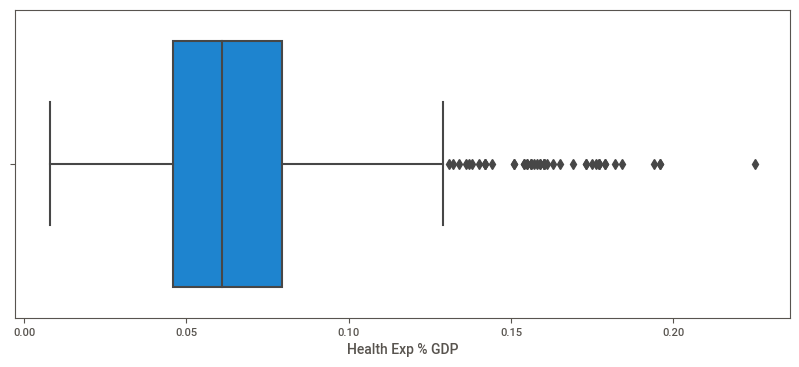

In [46]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data5['Health Exp % GDP'])
plt.show()

In [47]:
data5['Health Exp % GDP'].describe()

count    2351.000000
mean        0.064698
std         0.026208
min         0.008000
25%         0.046000
50%         0.061000
75%         0.079500
max         0.225000
Name: Health Exp % GDP, dtype: float64

In [48]:
#Null value Imputation for 'Health Exp % GDP' Column

# Group the data by 'Country' and calculate the median 'Health Exp % GDP_median' for each country
median_Health_Exp_GDP_per_country = data5.groupby('Country')['Health Exp % GDP'].median().reset_index()

# Merge the original DataFrame with the median 'Health Exp % GDP' data
data5_imputed = pd.merge(data5, median_Health_Exp_GDP_per_country, on='Country', suffixes=('', '_median'))

# Fill NaN values in 'Health Exp % GDP' with the median 'Health Exp % GDP' for each country
data5_imputed['Health Exp % GDP'].fillna(data5_imputed['Health Exp % GDP_median'], inplace=True)

# Drop the auxiliary 'Health Exp % GDP_median' column
data5_imputed.drop('Health Exp % GDP_median', axis=1, inplace=True)

# Display the result
data5_imputed.sample(5)

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
420,0.020,43311.0,Morocco,5.694802e+10,0.052,99.0,0.037,0.1,71.0,67.0,0.3,29855820,0.546,4.540000e+09,9.120000e+08
2224,0.019,194.0,Grenada,5.232798e+08,0.076,392.0,0.013,0.1,73.0,68.0,0.1,101849,0.361,8.300000e+07,8.000000e+06
784,0.007,38415.0,"Hong Kong SAR, China",1.690998e+11,NaN,NaN,NaN,0.6,85.0,79.0,1.2,6783500,1.000,1.187400e+10,1.327000e+10
1212,0.012,55735.0,Denmark,2.126219e+11,0.095,3756.0,0.004,0.8,80.0,75.0,0.9,5390574,0.854,5.271000e+09,6.659000e+09
1841,0.017,869.0,French Polynesia,3.447543e+09,NaN,NaN,NaN,0.3,78.0,73.0,0.7,262877,0.567,5.220000e+08,1.590000e+08


In [49]:
data5_imputed['Health Exp % GDP'].isna().sum()

117

In [50]:
# Check for null values in 'Health Exp % GDP' column
countries_with_null_Health_Exp_GDP = data5_imputed[data5_imputed['Health Exp % GDP'].isna()]['Country'].unique()

# Display the result
print("Countries with Null Health Exp % GDP:")
print(countries_with_null_Health_Exp_GDP)


# List of countries to remove
countries_to_remove = countries_with_null_Health_Exp_GDP

# Remove rows for the specified countries where 'GDP' is null
data6 = data5_imputed[~((data5_imputed['Country'].isin(countries_to_remove)) & data5_imputed['Health Exp % GDP'].isna())]

# Display the result
data6.sample(5)



Countries with Null Health Exp % GDP:
['Zimbabwe' 'Hong Kong SAR, China' 'Macao SAR, China' 'Faeroe Islands'
 'French Polynesia' 'New Caledonia' 'Aruba' 'Bermuda' 'Greenland']


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1831,0.021,1115.0,Fiji,3.753485e+09,0.038,167.0,0.020,0.3,73.0,67.0,0.8,867921,0.522,9.330000e+08,1.150000e+08
847,0.010,465632.0,"Korea, Rep.",6.090201e+11,0.048,581.0,0.006,0.6,80.0,73.0,0.7,47622179,0.803,7.621000e+09,1.144000e+10
877,0.029,1580.0,Lao PDR,3.452896e+09,0.043,25.0,0.068,0.0,66.0,64.0,0.2,5895930,0.285,1.600000e+08,1.500000e+07
2001,0.017,160952.0,Argentina,6.031530e+11,0.085,995.0,0.012,0.6,80.0,72.0,1.6,41086927,0.913,5.655000e+09,8.213000e+09
766,0.012,5790017.0,China,8.229490e+12,0.054,322.0,0.012,0.4,77.0,74.0,0.8,1350695000,0.519,5.493700e+10,1.098980e+11


In [51]:
data6['Health Exp % GDP'].isna().sum()

0

In [52]:
data6['Country'].nunique()

181

Treatment of Column 'Health Exp/Capita'

In [53]:
data6['Health Exp/Capita'].isna().sum()

2

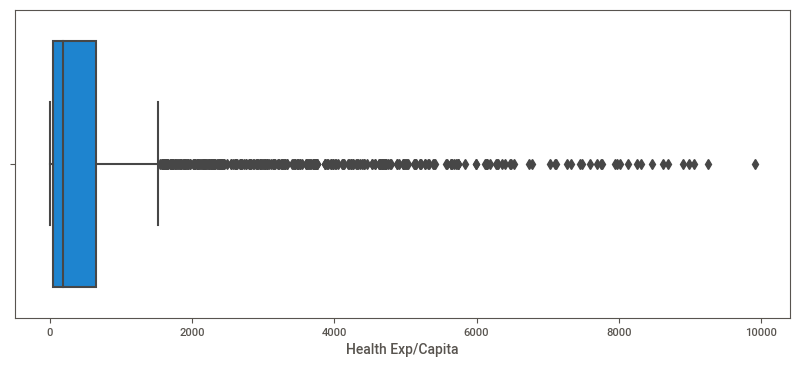

In [54]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data6['Health Exp/Capita'])
plt.show()

In [55]:
data6['Health Exp/Capita'].describe()

count    2351.000000
mean      769.891536
std      1433.322049
min         5.000000
25%        51.000000
50%       191.000000
75%       643.500000
max      9908.000000
Name: Health Exp/Capita, dtype: float64

In [56]:
#Null value Imputation for 'Health Exp/Capita' Column

# Group the data by 'Country' and calculate the median 'Health Exp/Capita_median' for each country
median_Health_Exp_Capita_per_country = data6.groupby('Country')['Health Exp/Capita'].median().reset_index()

# Merge the original DataFrame with the median 'Health Exp/Capita' data
data7 = pd.merge(data6, median_Health_Exp_Capita_per_country, on='Country', suffixes=('', '_median'))

# Fill NaN values in 'Health Exp/Capita' with the median 'Health Exp/Capita' for each country
data7['Health Exp/Capita'].fillna(data7['Health Exp/Capita_median'], inplace=True)

# Drop the auxiliary 'Health Exp/Capita_median' column
data7.drop('Health Exp/Capita_median', axis=1, inplace=True)

# Display the result
data7.sample(5)

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1619,0.034,62834.0,Iraq,8.883773e+10,0.037,95.0,0.032,0.0,72.0,66.0,0.5,28740630,0.689,5.550000e+08,7.050000e+08
1227,0.008,806703.0,Germany,2.766254e+12,0.108,3624.0,0.004,0.7,82.0,76.0,0.9,82469422,0.734,4.053100e+10,8.483800e+10
93,0.039,246.0,Central African Republic,9.913879e+08,0.042,11.0,0.113,0.0,46.0,42.0,0.0,3767248,0.378,3.000000e+06,2.900000e+07
1677,0.024,21896.0,Oman,1.986788e+10,0.031,264.0,0.014,0.0,74.0,70.0,0.1,2192535,0.716,3.770000e+08,6.290000e+08
266,0.034,9289.0,Ghana,2.041024e+10,0.054,48.0,0.057,0.0,60.0,58.0,0.2,21947779,0.480,9.100000e+08,5.750000e+08


In [57]:
data7['Health Exp/Capita'].isna().sum()

0

Treatment of Column 'Infant Mortality Rate'

In [58]:
data7['Infant Mortality Rate'].isna().sum()

0

Treatment of Column 'Internet Usage'

In [59]:
data7['Internet Usage'].isna().sum()

48

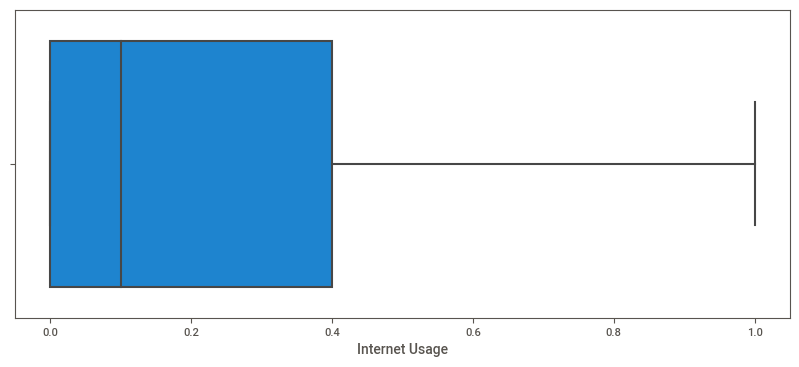

In [60]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data7['Internet Usage'])
plt.show()

In [61]:
data7['Internet Usage'].describe()

count    2305.000000
mean        0.223167
std         0.255345
min         0.000000
25%         0.000000
50%         0.100000
75%         0.400000
max         1.000000
Name: Internet Usage, dtype: float64

In [62]:
#Null value Imputation for 'Internet Usage' Column

# Group the data by 'Country' and calculate the mean 'Internet Usage' for each country
mean_Internet_Usage_per_country = data7.groupby('Country')['Internet Usage'].mean().reset_index()

# Merge the original DataFrame with the mean 'Internet Usage' data
data7_imputed = pd.merge(data7, mean_Internet_Usage_per_country, on='Country', suffixes=('', '_mean'))

# Fill NaN values in 'Internet Usage' with the mean 'Internet Usage' for each country
data7_imputed['Internet Usage'].fillna(data7_imputed['Internet Usage_mean'], inplace=True)

# Drop the auxiliary 'Internet Usage_mean' column
data7_imputed.drop('Internet Usage_mean', axis=1, inplace=True)

# Display the result
data7_imputed.sample(5)

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1898,0.020,345.0,Antigua and Barbuda,7.876934e+08,0.040,408.0,0.014,0.1,76.0,71.0,0.3,77648,0.321,2.910000e+08,3.100000e+07
123,0.039,121.0,Comoros,4.031795e+08,0.046,30.0,0.069,0.0,61.0,58.0,0.1,616526,0.279,2.700000e+07,1.100000e+07
275,0.041,1324.0,Guinea,2.949637e+09,0.061,20.0,0.095,0.0,51.0,51.0,0.0,9045748,0.317,NaN,3.800000e+07
2220,0.020,9633.0,Panama,2.881410e+10,0.085,627.0,0.017,0.4,80.0,74.0,1.8,3678128,0.651,2.552000e+09,5.750000e+08
1919,0.017,190057.0,Argentina,4.060037e+11,0.083,686.0,0.014,0.3,79.0,72.0,1.2,39676083,0.906,5.295000e+09,5.962000e+09


In [63]:
data7_imputed['Internet Usage'].isna().sum()

0

Treatment of Column 'Life Expectancy Female'

In [64]:
data7_imputed['Life Expectancy Female'].isna().sum()

51

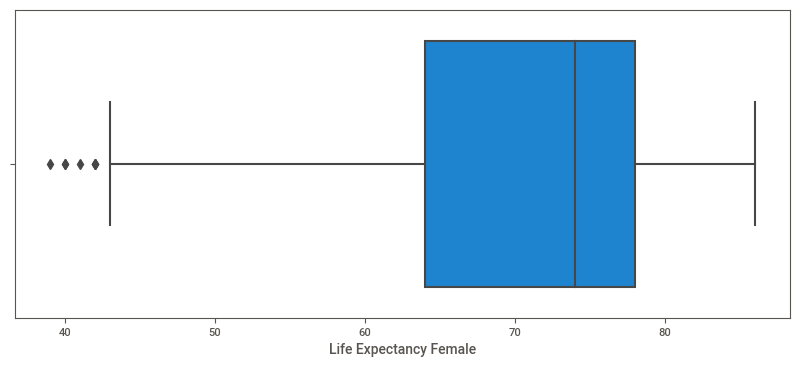

In [65]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data7_imputed['Life Expectancy Female'])
plt.show()

In [66]:
data7_imputed['Life Expectancy Female'].describe()

count    2302.000000
mean       70.744570
std        10.597569
min        39.000000
25%        64.000000
50%        74.000000
75%        78.000000
max        86.000000
Name: Life Expectancy Female, dtype: float64

In [67]:
#Null value Imputation for 'Life Expectancy Female' Column

# Group the data by 'Country' and calculate the median 'Life Expectancy Female_median' for each country
median_Life_Expectancy_Female_per_country = data7_imputed.groupby('Country')['Life Expectancy Female'].median().reset_index()

# Merge the original DataFrame with the median 'Life Expectancy Female' data
data8 = pd.merge(data7_imputed, median_Life_Expectancy_Female_per_country, on='Country', suffixes=('', '_median'))

# Fill NaN values in 'Life Expectancy Female' with the median 'Life Expectancy Female' for each country
data8['Life Expectancy Female'].fillna(data8['Life Expectancy Female_median'], inplace=True)

# Drop the auxiliary 'Life Expectancy Female_median' column
data8.drop('Life Expectancy Female_median', axis=1, inplace=True)

# Display the result
data8.sample(5)


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2344,0.022,168268.0,"Venezuela, RB",1.124514e+11,0.056,239.0,0.016,0.1,76.0,70.0,0.3,26261326,0.885,5.540000e+08,1.604000e+09
1354,0.010,2299.0,Malta,4.296165e+09,0.079,839.0,0.006,0.3,81.0,76.0,0.7,395969,0.929,7.570000e+08,1.800000e+08
1575,0.011,531939.0,United Kingdom,1.620901e+12,0.076,2065.0,0.005,0.6,81.0,76.0,0.8,59370479,0.790,2.781900e+10,5.112500e+10
2028,0.020,5475.0,Costa Rica,1.594644e+10,0.071,287.0,0.011,0.1,80.0,75.0,0.1,3929588,0.590,1.477000e+09,5.510000e+08
936,0.012,49006.0,Singapore,9.583597e+10,0.027,662.0,0.003,0.4,80.0,76.0,0.7,4027900,1.000,5.142000e+09,4.535000e+09


In [68]:
data8['Life Expectancy Female'].isna().sum()

13

In [69]:
# Check for null values in 'Life Expectancy Female' column
countries_with_null_Life_Expectancy_Female = data8[data8['Life Expectancy Female'].isna()]['Country'].unique()

# Display the result
print("Countries with Null Life Expectancy Female:")
print(countries_with_null_Life_Expectancy_Female)


# List of countries to remove
countries_to_remove = countries_with_null_Life_Expectancy_Female

# Remove rows for the specified countries where 'GDP' is null
data9 = data8[~((data8['Country'].isin(countries_to_remove)) & data8['Life Expectancy Female'].isna())]

# Display the result
data9.sample(5)


Countries with Null Life Expectancy Female:
['Andorra']


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
994,0.038,180.0,Timor-Leste,4.626000e+08,0.106,46.0,0.062,0.0,65.0,62.0,0.0,999053,0.269,2.000000e+07,2.000000e+06
917,0.028,158895.0,Pakistan,1.523857e+11,0.035,31.0,0.078,0.1,66.0,65.0,0.4,163928329,0.354,9.120000e+08,2.083000e+09
1383,0.013,2057.0,Montenegro,2.257182e+09,0.087,319.0,0.010,0.3,76.0,71.0,0.9,615820,0.622,NaN,NaN
2052,0.010,26091.0,Cuba,6.823390e+10,0.106,648.0,0.006,0.2,81.0,77.0,0.1,11276053,0.767,2.503000e+09,NaN
1372,0.012,4686.0,Moldova,4.402496e+09,0.109,134.0,0.017,0.2,72.0,64.0,0.5,3576910,0.451,2.290000e+08,2.900000e+08


In [70]:
data9['Life Expectancy Female'].isna().sum()

0

In [71]:
data9['Country'].nunique()

180

Treatment of Column 'Life Expectancy Male'

In [72]:
data9['Life Expectancy Male'].isna().sum()

38

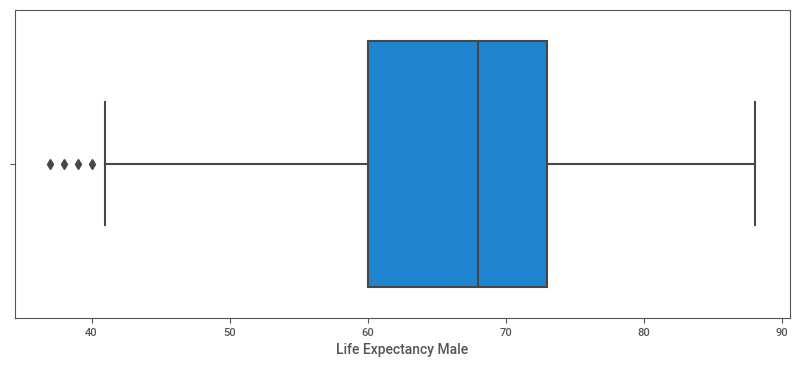

In [73]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data9['Life Expectancy Male'])
plt.show()

In [74]:
data9['Life Expectancy Male'].describe()

count    2302.000000
mean       66.093831
std         9.297342
min        37.000000
25%        60.000000
50%        68.000000
75%        73.000000
max        88.000000
Name: Life Expectancy Male, dtype: float64

In [75]:
#Null value Imputation for 'Life Expectancy Male' Column

# Group the data by 'Country' and calculate the median 'Life Expectancy Male_median' for each country
median_Life_Expectancy_Male_per_country = data9.groupby('Country')['Life Expectancy Male'].median().reset_index()

# Merge the original DataFrame with the median 'Life Expectancy Male' data
data10 = pd.merge(data9, median_Life_Expectancy_Male_per_country, on='Country', suffixes=('', '_median'))

# Fill NaN values in 'Life Expectancy Male' with the median 'Life Expectancy Male' for each country
data10['Life Expectancy Male'].fillna(data10['Life Expectancy Male_median'], inplace=True)

# Drop the auxiliary 'Life Expectancy Male_median' column
data10.drop('Life Expectancy Male_median', axis=1, inplace=True)

# Display the result
data10.sample(5)


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2056,0.024,21500.0,Dominican Republic,2.657040e+10,0.063,176.0,0.032,0.1,74.0,68.0,0.2,8935261,0.634,2.730000e+09,4.290000e+08
323,0.028,18.0,Lesotho,2.487353e+09,0.117,146.0,0.073,0.0,48.0,48.0,0.6,2029516,0.253,2.900000e+07,3.000000e+08
2138,0.028,2112.0,Haiti,4.879739e+09,0.057,30.0,0.064,0.1,62.0,58.0,0.1,9388642,0.458,1.260000e+08,2.390000e+08
804,0.008,1219589.0,Japan,5.905631e+12,0.100,4641.0,0.002,0.8,86.0,79.0,1.0,127817277,0.912,1.253400e+10,3.976000e+10
2254,0.017,367.0,St. Lucia,9.085583e+08,0.063,348.0,0.015,0.2,75.0,71.0,0.6,165407,0.231,3.820000e+08,3.900000e+07


In [76]:
data10['Life Expectancy Male'].isna().sum()

0

Treatment of Column 'Mobile Phone Usage'

In [77]:
data10['Mobile Phone Usage'].isna().sum()

48

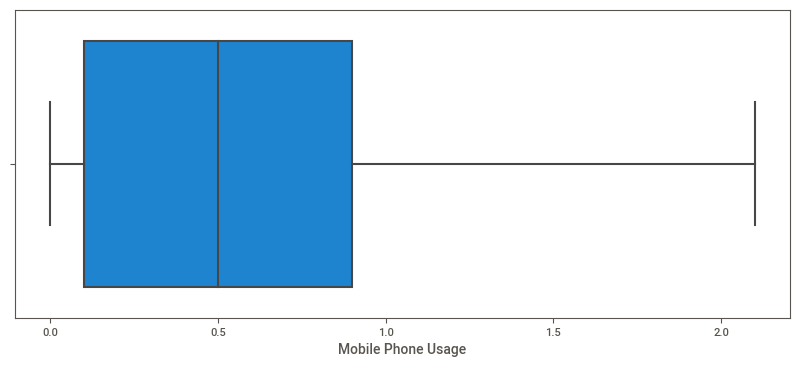

In [78]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data10['Mobile Phone Usage'])
plt.show()

In [79]:
data10['Mobile Phone Usage'].describe()

count    2292.000000
mean        0.564791
std         0.465290
min         0.000000
25%         0.100000
50%         0.500000
75%         0.900000
max         2.100000
Name: Mobile Phone Usage, dtype: float64

In [80]:
#Null value Imputation for 'Mobile Phone Usage' Column

# Group the data by 'Country' and calculate the mean 'Mobile Phone Usage' for each country
mean_Mobile_Phone_Usage_per_country = data10.groupby('Country')['Mobile Phone Usage'].mean().reset_index()

# Merge the original DataFrame with the mean 'Mobile Phone Usage' data
data10_imputed = pd.merge(data10, mean_Mobile_Phone_Usage_per_country, on='Country', suffixes=('', '_mean'))

# Fill NaN values in 'Mobile Phone Usage' with the mean 'Mobile Phone Usage' for each country
data10_imputed['Mobile Phone Usage'].fillna(data10_imputed['Mobile Phone Usage_mean'], inplace=True)

# Drop the auxiliary 'Mobile Phone Usage_mean' column
data10_imputed.drop('Mobile Phone Usage_mean', axis=1, inplace=True)

# Display the result
data10_imputed.sample(5)


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1403,0.012,42666.0,Norway,5.000299e+11,0.090,9055.0,0.002,0.9,84.0,80.0,1.2,5018573,0.797,5.353000e+09,1.755900e+10
694,0.023,37554.0,Bangladesh,6.027756e+10,0.032,13.0,0.051,0.0,68.0,67.0,0.1,143135180,0.268,7.900000e+07,3.750000e+08
406,0.016,3146.0,Mauritius,5.609836e+09,0.039,188.0,0.014,0.1,76.0,69.0,0.4,1222811,0.420,9.600000e+08,2.360000e+08
1752,0.014,373081.0,Australia,1.141794e+12,0.089,5138.0,0.004,0.8,84.0,80.0,1.0,22031800,0.887,3.233600e+10,2.753400e+10
2039,0.010,26091.0,Cuba,6.823390e+10,0.106,648.0,0.006,0.2,81.0,77.0,0.1,11276053,0.767,2.503000e+09,NaN


In [81]:
data10_imputed['Mobile Phone Usage'].isna().sum()

0

In [82]:
data11=data10_imputed

Treatment of Column 'Population Total'

In [83]:
data11['Population Total'].isna().sum()

0

Treatment of Column 'Population Urban'

In [84]:
data11['Population Urban'].isna().sum()

0

Treatment of Column 'Tourism Inbound'

In [85]:
data11['Tourism Inbound'].isna().sum()

168

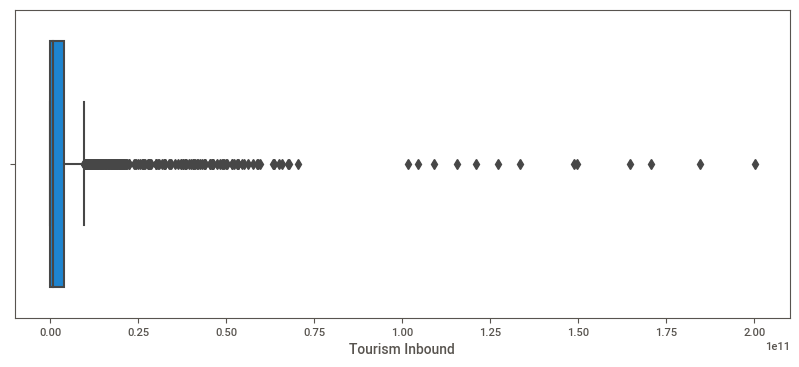

In [86]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data11['Tourism Inbound'])
plt.show()

In [87]:
data11['Tourism Inbound'].describe()

count    2.172000e+03
mean     5.062602e+09
std      1.421018e+10
min      7.000000e+05
25%      1.120000e+08
50%      7.220000e+08
75%      3.901500e+09
max      2.000920e+11
Name: Tourism Inbound, dtype: float64

In [88]:
#Null value Imputation for 'Tourism Inbound' Column

# Group the data by 'Country' and calculate the median 'Tourism Inbound' for each country
median_Tourism_Inbound_per_country = data11.groupby('Country')['Tourism Inbound'].median().reset_index()

# Merge the original DataFrame with the median 'Tourism Inbound' data
data11_imputed = pd.merge(data11, median_Tourism_Inbound_per_country, on='Country', suffixes=('', '_median'))

# Fill NaN values in 'Tourism Inbound' with the median 'Tourism Inbound' for each country
data11_imputed['Tourism Inbound'].fillna(data11_imputed['Tourism Inbound_median'], inplace=True)

# Drop the auxiliary 'Tourism Inbound_median' column
data11_imputed.drop('Tourism Inbound_median', axis=1, inplace=True)

# Display the result
data11_imputed.sample(5)

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
549,0.023,380811.0,South Africa,1.682193e+11,0.086,310.0,0.053,0.1,54.0,51.0,0.4,46409243,0.584,6.674000e+09,3.655000e+09
160,0.037,7664.0,Cote d'Ivoire,1.548109e+10,0.056,50.0,0.091,0.0,48.0,46.0,0.1,17144325,0.462,9.100000e+07,5.710000e+08
1086,0.012,103215.0,Belgium,4.596192e+11,0.095,4136.0,0.004,0.6,83.0,77.0,1.0,10625700,0.975,1.237100e+10,1.921500e+10
272,0.031,7444.0,Ghana,4.174090e+10,0.052,83.0,0.053,0.1,62.0,60.0,1.0,25366462,0.521,1.154000e+09,9.790000e+08
256,0.043,436.0,"Gambia, The",9.006294e+08,0.045,25.0,0.053,0.1,59.0,57.0,0.8,1628332,0.556,6.400000e+07,9.000000e+06


In [89]:
data11_imputed['Tourism Inbound'].isna().sum()

26

In [90]:
# Check for null values in 'Tourism Inbound' column
countries_with_null_Tourism_Inbound = data11_imputed[data11_imputed['Tourism Inbound'].isna()]['Country'].unique()

# Display the result
print("Countries with Null Tourism Inbound:")
print(countries_with_null_Tourism_Inbound)


# List of countries to remove
countries_to_remove = countries_with_null_Tourism_Inbound

# Remove rows for the specified countries where 'GDP' is null
data12 = data11_imputed[~((data11_imputed['Country'].isin(countries_to_remove)) & data11_imputed['Tourism Inbound'].isna())]

# Display the result
data12.sample(5)



Countries with Null Tourism Inbound:
['Mauritania' 'Turkmenistan']


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
183,0.025,125452.0,"Egypt, Arab Rep.",9.763201e+10,0.058,76.0,0.034,0.0,71.0,66.0,0.0,67204189,0.428,4.119000e+09,1.248000e+09
1526,0.010,41375.0,Switzerland,3.847550e+11,0.109,5637.0,0.004,0.7,84.0,79.0,0.9,7437115,0.735,1.193700e+10,1.057900e+10
161,0.037,7825.0,Cote d'Ivoire,1.636344e+10,0.057,53.0,0.089,0.0,48.0,46.0,0.1,17393994,0.468,9.300000e+07,5.490000e+08
1337,0.011,11309.0,"Macedonia, FYR",1.039522e+10,0.069,344.0,0.008,0.6,77.0,73.0,1.1,2103890,0.570,2.420000e+08,1.590000e+08
992,0.038,176.0,Timor-Leste,4.555000e+08,0.086,27.0,0.069,0.0,64.0,61.0,0.0,966987,0.257,2.100000e+07,NaN


In [91]:
data12['Tourism Inbound'].isna().sum()

0

In [92]:
data12['Country'].nunique()

178

Treatment of Column 'Tourism Outbound'

In [93]:
data12['Tourism Outbound'].isna().sum()

204

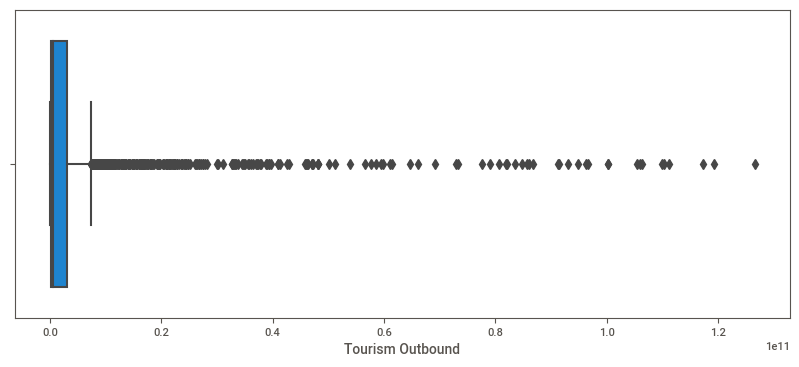

In [94]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data12['Tourism Outbound'])
plt.show()

In [95]:
data12['Tourism Outbound'].describe()

count    2.110000e+03
mean     4.892312e+09
std      1.358724e+10
min      2.000000e+05
25%      1.080000e+08
50%      4.755000e+08
75%      3.005500e+09
max      1.265730e+11
Name: Tourism Outbound, dtype: float64

In [96]:
#Null value Imputation for 'Tourism Outbound' Column

# Group the data by 'Country' and calculate the median 'Tourism Outbound' for each country
median_Tourism_Outbound_per_country = data12.groupby('Country')['Tourism Outbound'].median().reset_index()

# Merge the original DataFrame with the median 'Tourism Outbound' data
data12_imputed = pd.merge(data12, median_Tourism_Outbound_per_country, on='Country', suffixes=('', '_median'))

# Fill NaN values in 'Tourism Outbound' with the median 'Tourism Outbound' for each country
data12_imputed['Tourism Outbound'].fillna(data12_imputed['Tourism Outbound_median'], inplace=True)

# Drop the auxiliary 'Tourism Outbound_median' column
data12_imputed.drop('Tourism Outbound_median', axis=1, inplace=True)

# Display the result
data12_imputed.sample(5)

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
593,0.038,1456.0,Togo,3.163417e+09,0.065,34.0,0.064,0.0,56.0,54.0,0.3,5987491,0.366,4.400000e+07,6.800000e+07
1490,0.012,49105.0,Sweden,4.861587e+11,0.092,4886.0,0.003,0.9,83.0,79.0,1.1,9219637,0.847,1.206000e+10,1.544700e+10
745,0.012,4323.0,Georgia,5.125274e+09,0.085,97.0,0.024,0.0,76.0,69.0,0.2,4318300,0.524,2.090000e+08,1.960000e+08
1218,0.010,48676.0,Hungary,1.266317e+11,0.077,977.0,0.006,0.6,78.0,70.0,1.2,10022650,0.684,6.740000e+09,3.233000e+09
734,0.012,6414463.0,China,2.712951e+12,0.046,93.0,0.019,0.1,76.0,73.0,0.3,1311020000,0.439,3.713200e+10,2.824200e+10


In [97]:
data12_imputed['Tourism Outbound'].isna().sum()

39

In [98]:
# Check for null values in 'Tourism Outbound' column
countries_with_null_Tourism_Outbound = data12_imputed[data12_imputed['Tourism Outbound'].isna()]['Country'].unique()

# Display the result
print("Countries with Null Tourism Outbound:")
print(countries_with_null_Tourism_Outbound)


# List of countries to remove
countries_to_remove = countries_with_null_Tourism_Outbound

# Remove rows for the specified countries where 'GDP' is null
data13 = data12_imputed[~((data12_imputed['Country'].isin(countries_to_remove)) & data12_imputed['Tourism Outbound'].isna())]

# Display the result
data13.sample(5)



Countries with Null Tourism Outbound:
['Eritrea' 'Uzbekistan' 'Cuba']


,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2156,0.019,435046.0,Mexico,1.170086e+12,0.060,609.0,0.014,0.4,79.0,75.0,0.8,119361233,0.781,1.245800e+10,9.704000e+09
1442,0.009,51881.0,Serbia,3.811074e+10,0.105,561.0,0.006,0.5,78.0,73.0,1.2,7199077,0.553,1.066000e+09,1.176000e+09
1213,0.009,57352.0,Hungary,1.019257e+11,0.082,828.0,0.008,0.3,77.0,69.0,0.9,10107146,0.659,4.009000e+09,2.482000e+09
1072,0.008,27169.0,Bosnia and Herzegovina,1.240010e+10,0.085,275.0,0.007,0.3,78.0,73.0,0.5,3875157,0.392,6.580000e+08,2.100000e+08
2214,0.017,227.0,St. Kitts and Nevis,4.975485e+08,0.035,363.0,0.011,0.2,74.0,69.0,0.6,48421,0.322,1.030000e+08,1.000000e+07


In [99]:
data13['Tourism Outbound'].isna().sum()

0

In [100]:
data13['Country'].nunique()

175

In [101]:
data13.isna().sum()

Birth Rate                0
CO2 Emissions             0
Country                   0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

### Encoding Country Column

In [102]:
data_f=data13

In [103]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'Country' column
data_f['Country'] = label_encoder.fit_transform(data_f['Country'])

### Correlation

In [104]:
data_f.corr()

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Birth Rate,1.000000,-0.186676,0.002670,-0.208194,-0.185794,-0.456681,0.871011,-0.656012,-0.865798,-0.818383,-0.577698,-0.072819,-0.593340,-0.294281,-0.306729
CO2 Emissions,-0.186676,1.000000,0.040800,0.816268,0.164556,0.254756,-0.134035,0.148527,0.141238,0.148332,0.052832,0.719253,0.118412,0.704601,0.675265
Country,0.002670,0.040800,1.000000,0.080711,0.056924,0.019471,-0.078003,0.017722,0.031191,0.026524,0.022594,-0.048371,-0.105981,0.106102,0.069103
GDP,-0.208194,0.816268,0.080711,1.000000,0.329325,0.471095,-0.180498,0.299289,0.207588,0.219022,0.137980,0.376382,0.208387,0.888174,0.858800
Health Exp % GDP,-0.185794,0.164556,0.056924,0.329325,1.000000,0.481441,-0.150918,0.338648,0.174003,0.178428,0.151475,-0.061057,0.200319,0.370032,0.350448
Health Exp/Capita,-0.456681,0.254756,0.019471,0.471095,0.481441,1.000000,-0.439904,0.763429,0.490580,0.531319,0.466000,0.000237,0.495470,0.557067,0.582095
Infant Mortality Rate,0.871011,-0.134035,-0.078003,-0.180498,-0.150918,-0.439904,1.000000,-0.636353,-0.938558,-0.913536,-0.605555,0.010778,-0.604987,-0.262936,-0.269004
Internet Usage,-0.656012,0.148527,0.017722,0.299289,0.338648,0.763429,-0.636353,1.000000,0.661206,0.677808,0.761895,-0.031083,0.582412,0.390943,0.446773
Life Expectancy Female,-0.865798,0.141238,0.031191,0.207588,0.174003,0.490580,-0.938558,0.661206,1.000000,0.975040,0.575500,0.017349,0.627066,0.298290,0.302895
Life Expectancy Male,-0.818383,0.148332,0.026524,0.219022,0.178428,0.531319,-0.913536,0.677808,0.975040,1.000000,0.572532,0.034801,0.629539,0.312226,0.321893


<Axes: >

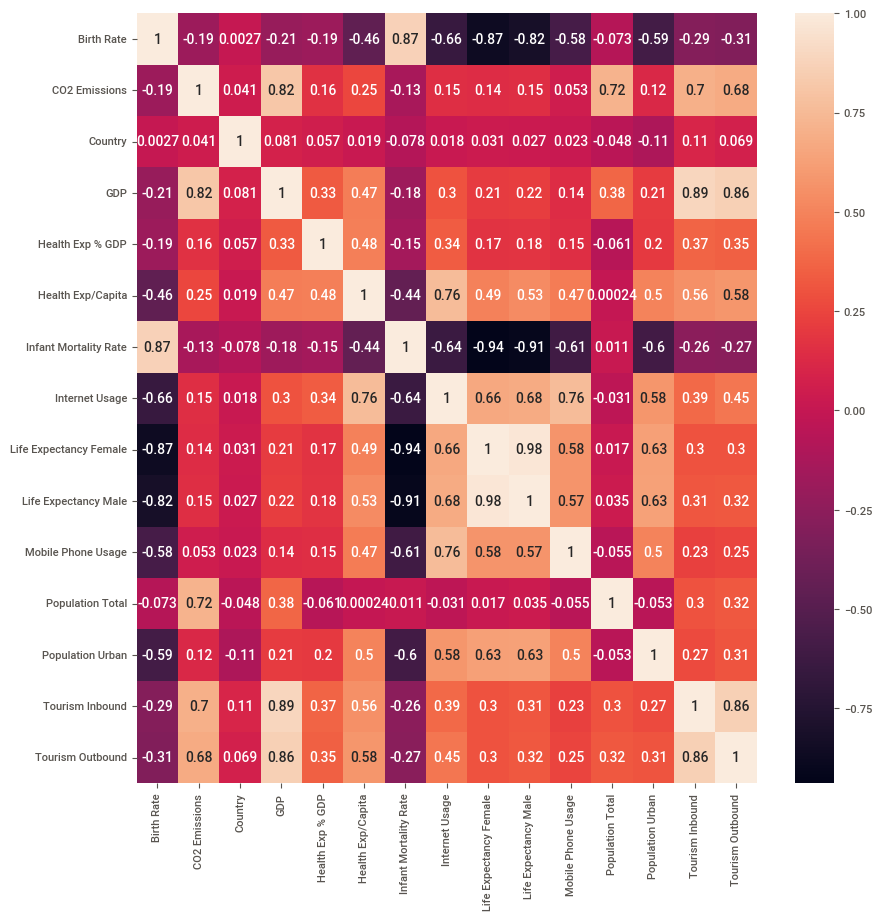

In [105]:
# Plotting of Correlation of DataSet
plt.figure(figsize=(10,10))
sns.heatmap(data_f.corr(), annot=True)

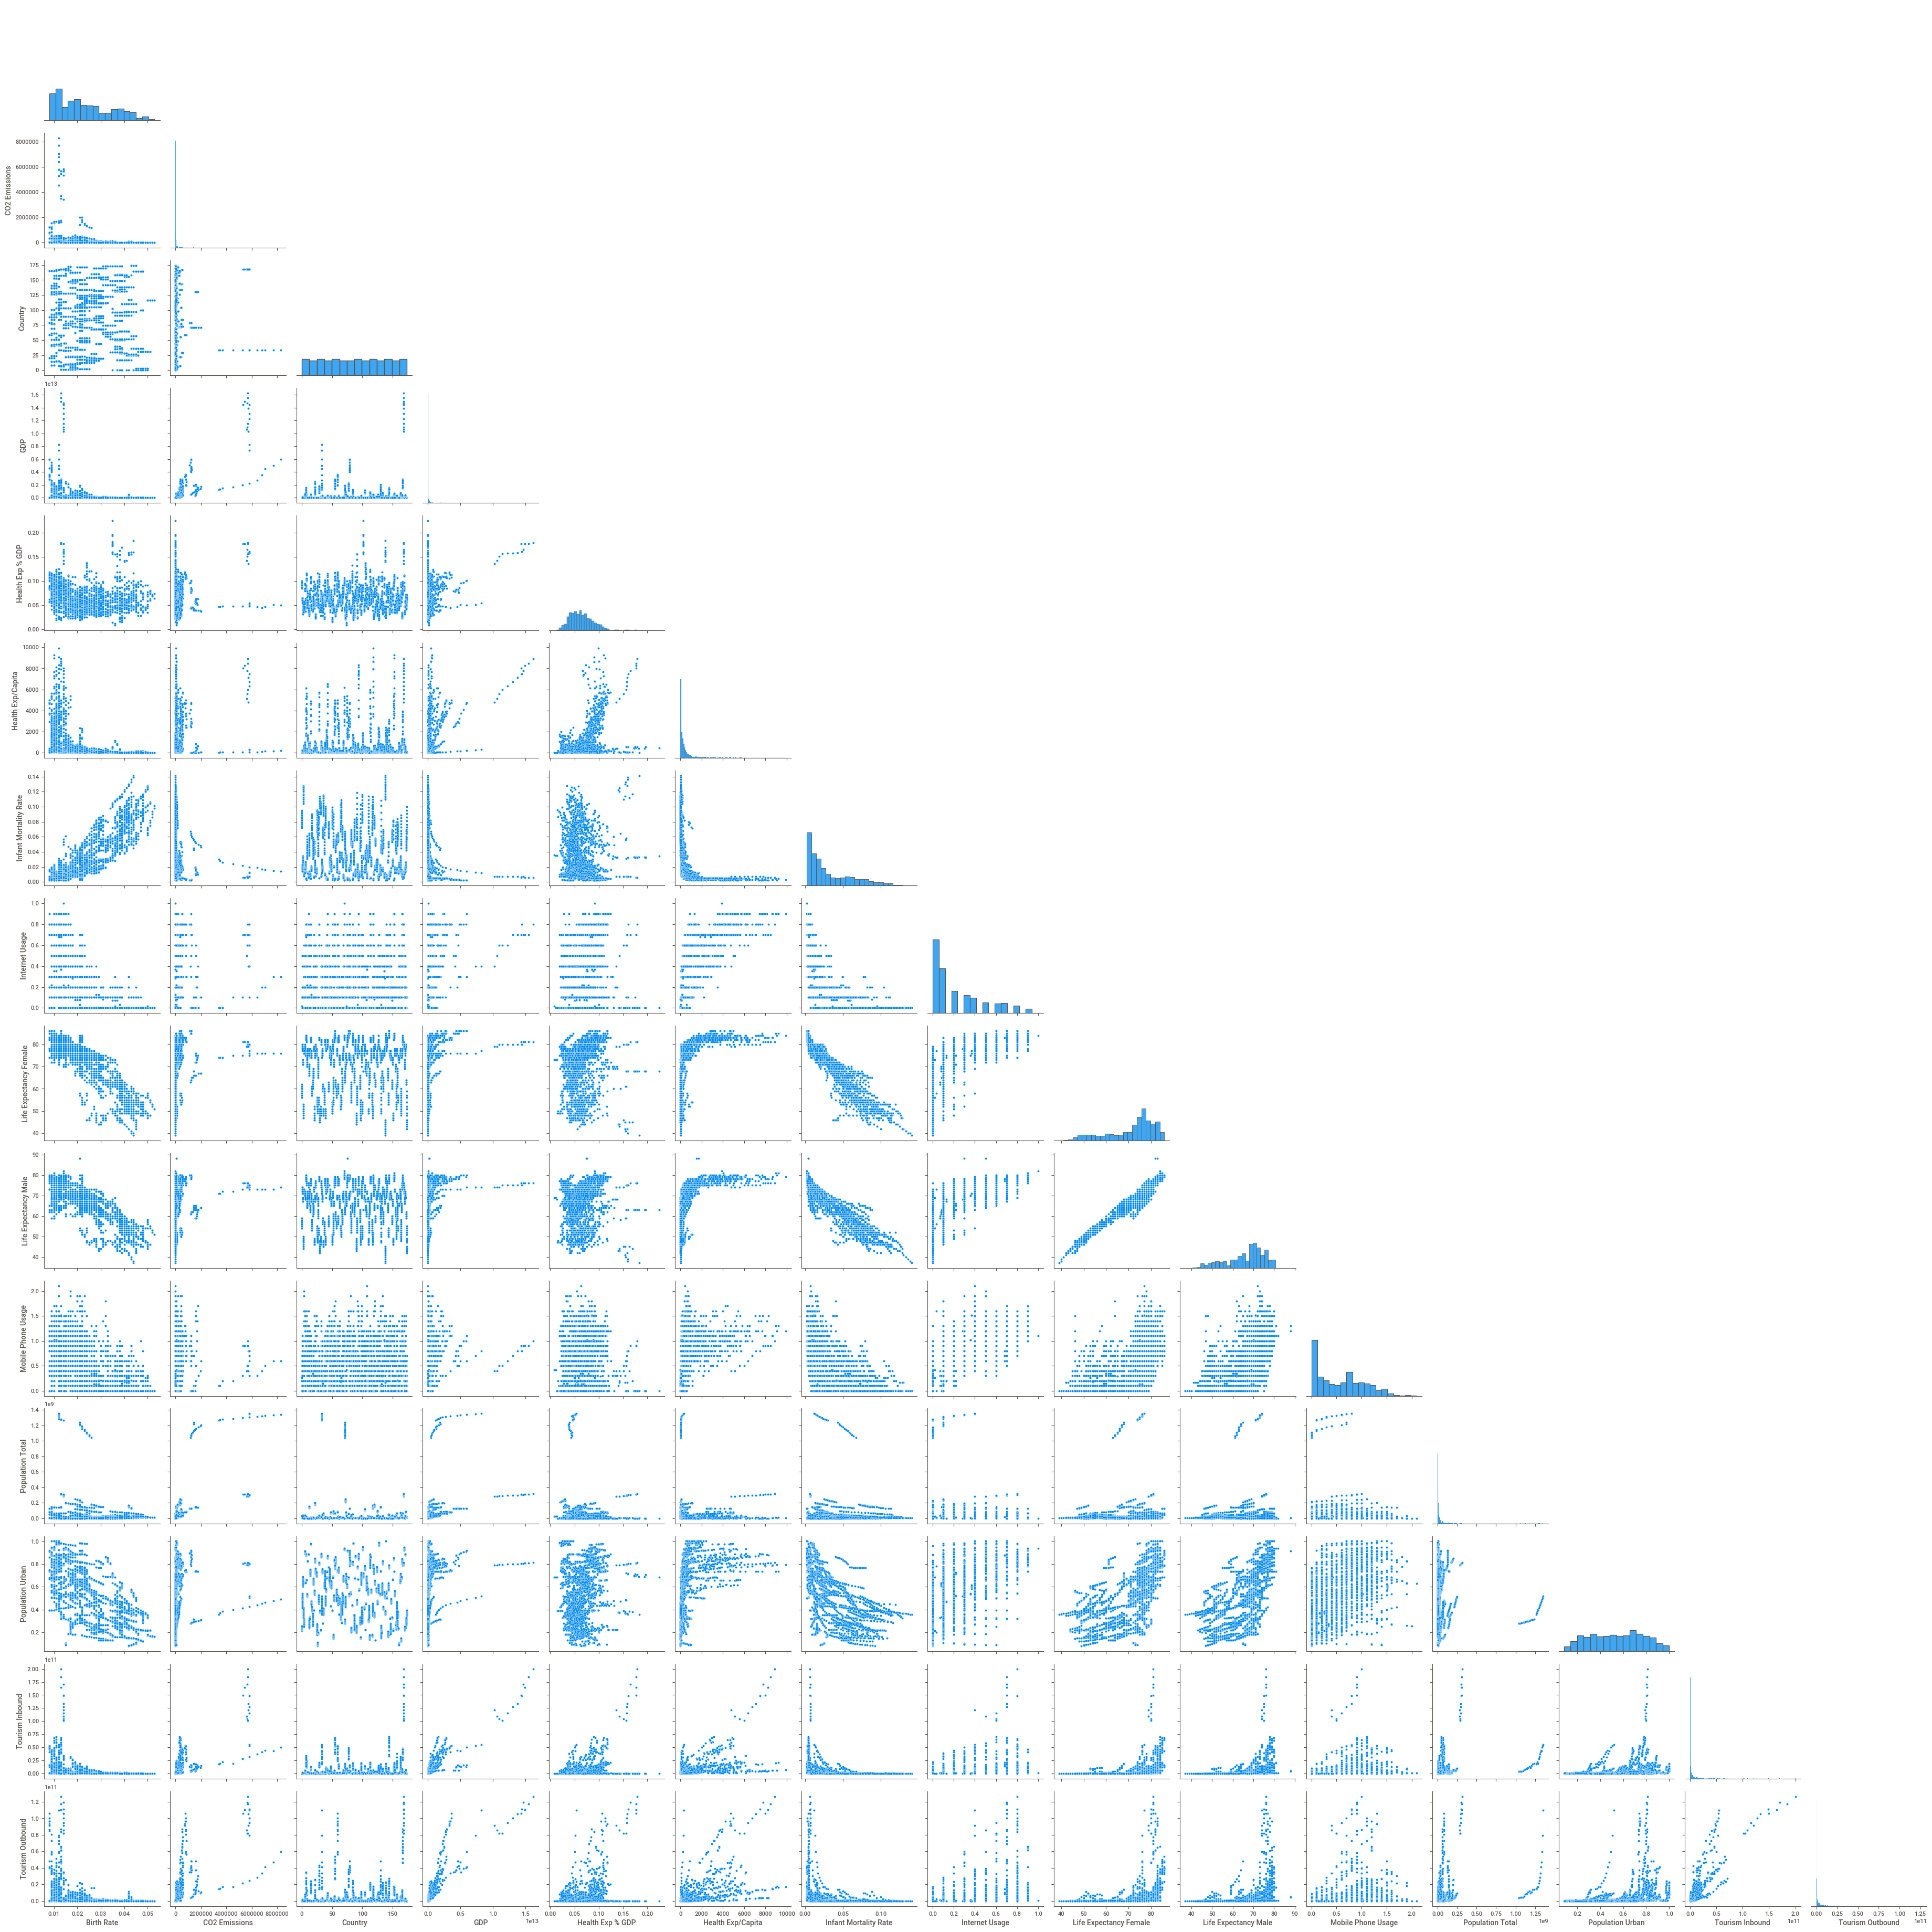

In [106]:
sns.pairplot(data_f,corner=True)

### Outliers

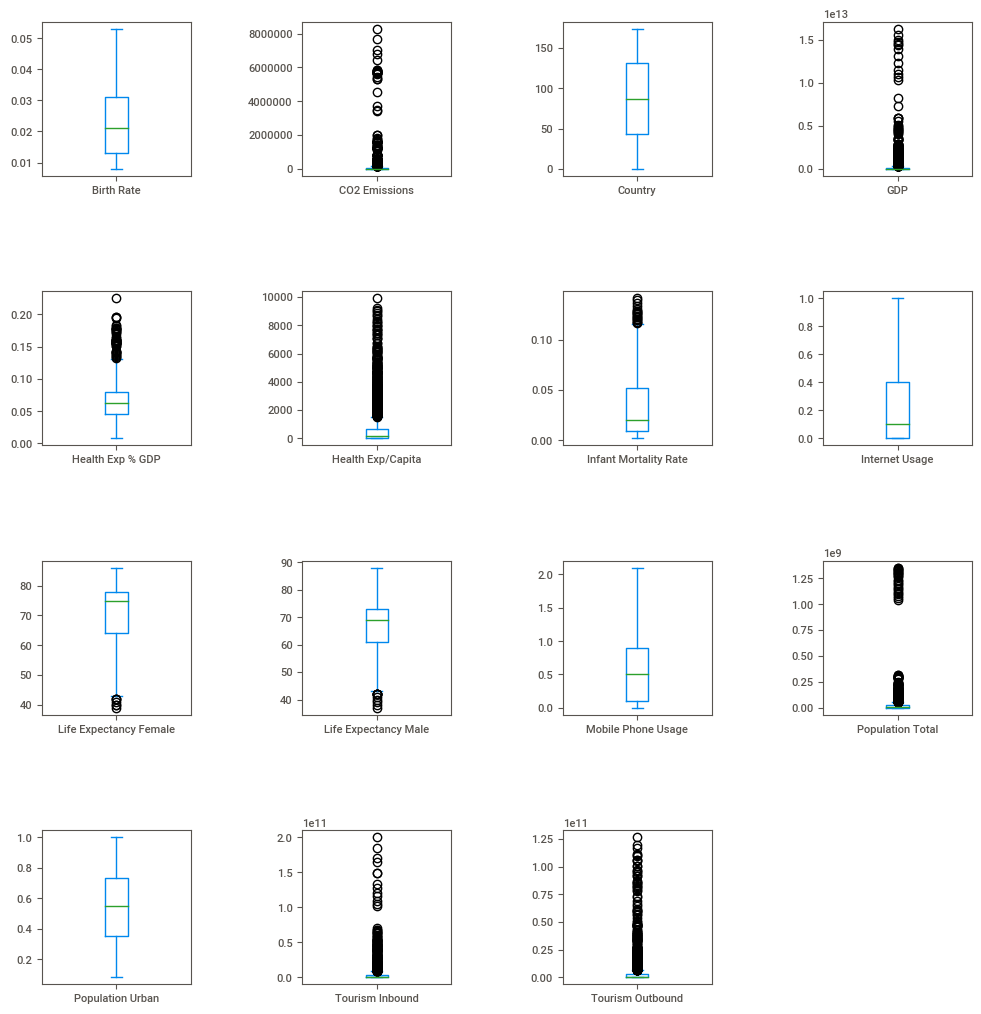

In [107]:
data_f.plot(kind='box',layout=(7,4), subplots=True,sharey=False,figsize=(12,23))
plt.subplots_adjust(hspace=0.75, wspace=0.75)

#### As we lose over 50% of data if we remove outliers, we are proceding without removing them.

### Scaling

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
#Scaling data

std_data = StandardScaler().fit_transform(data_f)

In [110]:
std_data

array([[-0.28111054, -0.10460979, -1.68259111, ...,  0.24215041,
        -0.34096077, -0.33359606],
       [-0.3690502 , -0.11025494, -1.68259111, ...,  0.27667341,
        -0.34110446, -0.33351997],
       [-0.3690502 , -0.10007412, -1.68259111, ...,  0.31119641,
        -0.34031416, -0.32941078],
       ...,
       [-0.19317089,  0.07200047,  1.66279592, ...,  1.48929385,
        -0.29124381, -0.17797981],
       [-0.28111054,  0.04078457,  1.66279592, ...,  1.48929385,
        -0.29045352, -0.12593017],
       [-0.28111054,  0.04078457,  1.66279592, ...,  1.49360922,
        -0.28334083, -0.1046233 ]])

#### Note :
 > We are proceding to build the model with standard scaled data

## Principal component analysis (PCA)

In [111]:
from sklearn.decomposition import PCA

In [112]:
pca= PCA()

In [113]:
pca_std = pca.fit_transform(std_data)

In [114]:
pca_std

array([[-1.04075297, -0.34629179,  1.34869505, ...,  0.07268727,
         0.0137047 ,  0.09678806],
       [-0.93951797, -0.38844568,  1.33011103, ...,  0.10195408,
         0.02461945,  0.17810337],
       [-0.92164908, -0.39786812,  1.36071806, ...,  0.07747681,
         0.01348526,  0.1796008 ],
       ...,
       [ 1.28548765, -1.03231296,  0.37197481, ...,  0.1040886 ,
        -0.1345458 , -0.06954484],
       [ 1.26414791, -1.08370156,  0.45777149, ...,  0.09807728,
        -0.1000604 , -0.05748783],
       [ 1.51724496, -1.14186709,  0.37536438, ...,  0.08513396,
        -0.13859243, -0.06718622]])

In [115]:
pca.explained_variance_ratio_

array([0.43782325, 0.20716574, 0.09149743, 0.06939512, 0.04644443,
       0.04134085, 0.03031375, 0.02561494, 0.0132187 , 0.01140983,
       0.0089988 , 0.00727774, 0.00453002, 0.00375883, 0.00121057])

In [116]:
cvar= np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
cvar

array([43.78, 64.5 , 73.65, 80.59, 85.23, 89.36, 92.39, 94.95, 96.27,
       97.41, 98.31, 99.04, 99.49, 99.87, 99.99])

Text(0, 0.5, 'Cummulative Varience % ')

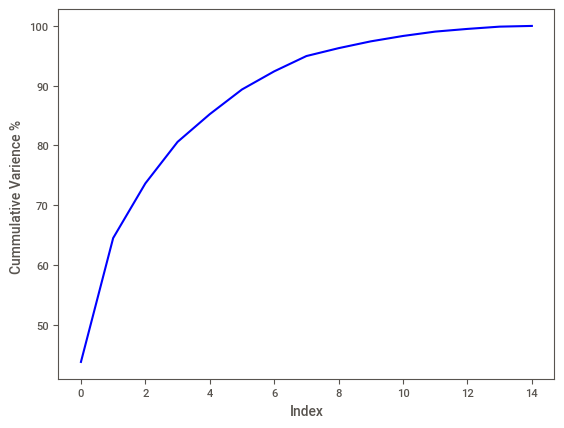

In [117]:
plt.plot(cvar,color = 'blue')
plt.xlabel('Index')
plt.ylabel('Cummulative Varience % ')

In [118]:
data_pca = pca_std[:,:12]

In [119]:
data_pca

array([[-1.04075297, -0.34629179,  1.34869505, ..., -0.10986771,
        -0.07102683, -0.01568228],
       [-0.93951797, -0.38844568,  1.33011103, ..., -0.09550319,
        -0.07981991, -0.0134039 ],
       [-0.92164908, -0.39786812,  1.36071806, ..., -0.10202439,
        -0.078029  , -0.02302784],
       ...,
       [ 1.28548765, -1.03231296,  0.37197481, ..., -0.16869551,
         0.30919735,  0.08401559],
       [ 1.26414791, -1.08370156,  0.45777149, ..., -0.07695564,
         0.3127647 ,  0.10943991],
       [ 1.51724496, -1.14186709,  0.37536438, ..., -0.08756361,
         0.51753999,  0.30216116]])

## Clustering

## K-Means Clustering

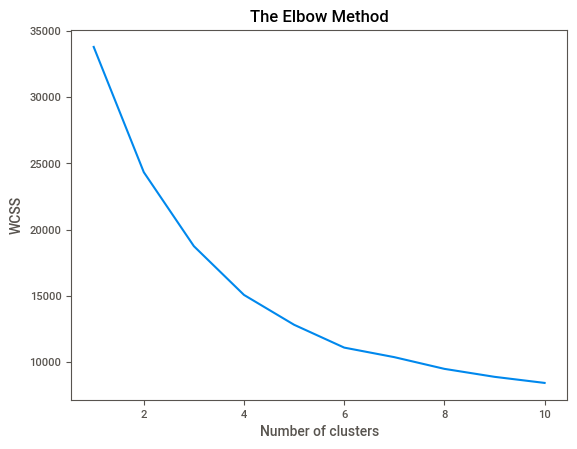

In [122]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [127]:
!pip install kneed
from kneed import KneeLocator

In [128]:
kl=KneeLocator(range(1,11),wcss,direction='decreasing',curve='convex')
kl.elbow

4

> We can take n_clusters = 4 based on the output from elbow method

In [130]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 33)
y_kmeans = kmeans.fit_predict(data_pca)

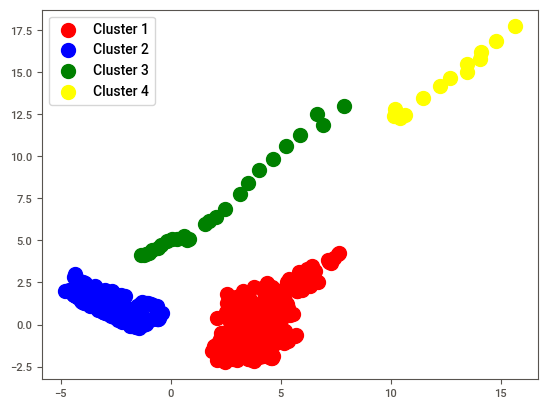

In [131]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_kmeans == 3, 0], data_pca[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.legend()


#### Silhouette Score

In [132]:
s1_kmeans = silhouette_score(data_pca,y_kmeans)
print('Silhouette Score for K-Means clustring :',s1_kmeans)

Silhouette Score for K-Means clustring : 0.3023961854249879


In [135]:
score = pd.DataFrame(columns=['Model Name','Silhouette Score'])
score

,Model Name,Silhouette Score


In [136]:
new_data = {'Model Name': 'K-Means (PCA)', 'Silhouette Score': s1_kmeans}
score = score.append(new_data, ignore_index=True)
score

,Model Name,Silhouette Score
0,K-Means (PCA),0.302396


## Hierarchical Clustering

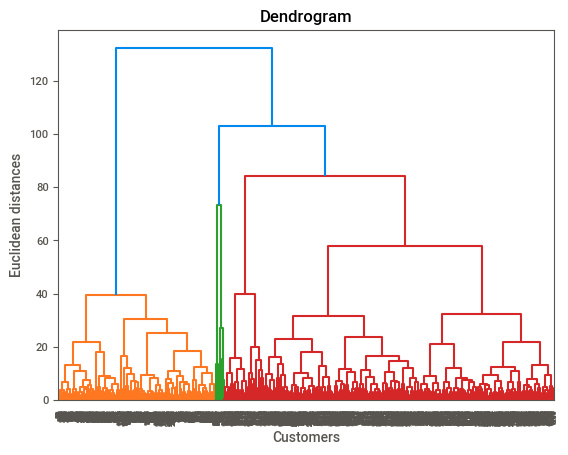

In [137]:
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [138]:
hc = AgglomerativeClustering(n_clusters =5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)

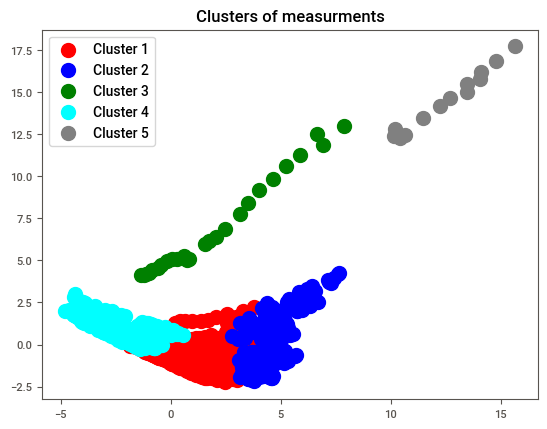

In [141]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_pca[y_hc == 4, 0], data_pca[y_hc == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')
plt.title('Clusters of measurments')
plt.legend()
plt.show()


#### Silhouette Score

In [142]:
s2_hierarchy = silhouette_score(data_pca,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.3157266193701039


In [143]:
new_data = {'Model Name': 'Hierarchial (PCA)', 'Silhouette Score': s2_hierarchy}
score = score.append(new_data, ignore_index=True)
score

,Model Name,Silhouette Score
0,K-Means (PCA),0.302396
1,Hierarchial (PCA),0.315727


## DBSCAN

In [144]:
dbscan = DBSCAN(eps=0.33,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

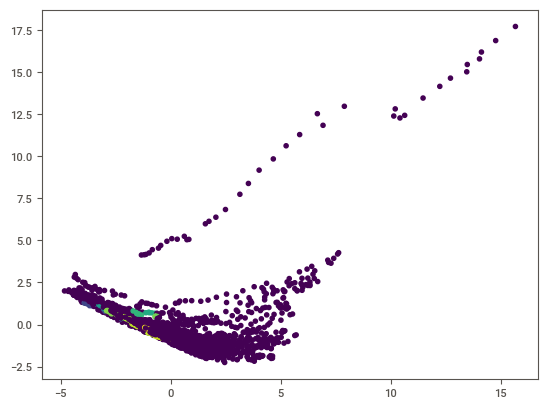

In [145]:
plt.scatter(data_pca[:,0],data_pca[:,1],c=dbscan_labels)
plt.show()

#### Silhouette Score

In [146]:
s3_dbscan = silhouette_score(data_pca, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s3_dbscan)

Silhouette Score for DBSCAN is: -0.3690399595972801


In [147]:
new_data = {'Model Name': 'DBSCAN (PCA)', 'Silhouette Score': s3_dbscan}
score = score.append(new_data, ignore_index=True)
score

,Model Name,Silhouette Score
0,K-Means (PCA),0.302396
1,Hierarchial (PCA),0.315727
2,DBSCAN (PCA),-0.369040
